# 4. Working with images

# FITS - Flexible Image Transport System
Let's say we'd like to save our months table. 
We'll use the FITS file format 
* released in 1981
* FITS is designed specifically for scientific data
* good for both tables and images
* you can still open files from 1981 -> backwards compatible

In [9]:
from astropy.io import fits

## Let's load an image

In [23]:
from astropy.io import fits

# ---------- Loading files ---------
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
image = fits.open(name)[0].data 
head  = fits.open(name)[0].header

Who wrote it?

In [25]:
from astropy.io import fits

# ---------- Loading files ---------
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
image = fits.open(name)[0].data 
head  = fits.open(name)[0].header

# ---------- Showing the header ------
head

SIMPLE  =                    T                                                  
BITPIX  =                  -32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                   44                                                  
NAXIS2  =                   44                                                  
EXTEND  =                    T / Tables following main image                    
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
BLOCKED =                    T / Tape may be blocked                            
OBJECT  = 'COSMOS_F'           / Source name                                    
TELESCOP= 'VLA     '        

## What is an image?

Image is a collection of values for different $x$ and $y$ coordinates

In [4]:
import matplotlib.pyplot as plt
from astropy.io import fits

# ---------- Loading files ---------
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
image = fits.open(name)[0].data 
head  = fits.open(name)[0].header

# ---------- Showing an image ------
image

array([[ -8.70451004e-06,  -7.03605656e-06,  -9.61110800e-06, ...,
         -2.11844035e-05,  -7.37752634e-06,   7.76577679e-07],
       [  4.06806839e-06,   8.79416348e-06,   6.58952240e-06, ...,
         -2.17131219e-05,  -2.04164917e-06,   8.11418522e-06],
       [  8.91225500e-06,   1.76336980e-05,   1.79761319e-05, ...,
         -1.59561550e-05,   4.33084642e-06,   1.55305715e-05],
       ..., 
       [  2.18399182e-05,   1.96641231e-05,   5.25467613e-06, ...,
          1.57720260e-05,   5.22840810e-06,   1.58473347e-06],
       [  6.44916599e-06,   5.88442708e-06,  -1.28183626e-06, ...,
          1.05489908e-05,   5.39193024e-07,  -2.78830476e-06],
       [ -8.53112851e-06,  -9.84953294e-06,  -1.01972282e-05, ...,
          7.38618610e-06,   1.27170281e-07,  -4.48623496e-06]], dtype=float32)

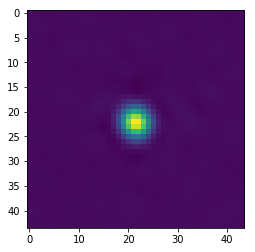

In [22]:
import matplotlib.pyplot as plt
from astropy.io import fits

# ---------- Loading files ---------
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
image = fits.open(name)[0].data 
head  = fits.open(name)[0].header

# ---------- Showing an image ------
f, ax = plt.subplots(1, 1)
ax.imshow(image)
f

# What's on the axes?
# What are the values?

## Coordinate systems


<img src="coords.png" style='width:100%;'>

## Brightness units
* Luminosity $L$ [W]
* Flux $F$ [W/m$^2$]
* Flux density $F_\nu$ [W/m$^2$/Hz]
    * 1 Jy = $10^{-26}$ W/m$^2$/Hz = $10^{-23}$ ergs/s/cm$^2$/Hz 
* Intensity $S$ [W/m$^2$/sr]
* Specific intensity $S_\nu$  [W/m$^2$/sr/Hz]

## Radio astronomy
<img src='https://upload.wikimedia.org/wikipedia/commons/6/63/USA.NM.VeryLargeArray.02.jpg'> (Source Wikipedia)


* In radio astronomy, pixels aren't the same as resolution.
* Greater number of pixels doesn't mean a greater resolution
* Resolution is determined by the beam size
Specific Intensity Jy/b

## Let's add a coordinate system to our image


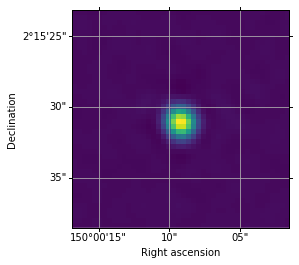

In [19]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# ---------- Loading files ---------
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
image = fits.open(name)[0].data
head  = fits.open(name)[0].header

# ---------- Loads coordinates -----
wcs = WCS(head, naxis=2) 

# ---------- Showing an image ------
f = plt.figure()
ax = f.add_subplot(1, 1, 1, projection=wcs)
ax.imshow(image)

# ----------- Axes labels -----------
ax.set_xlabel('Right ascension')
ax.set_ylabel('Declination')
# ----------- Grid -------------------
ax.grid(True)
f

## Colorbar

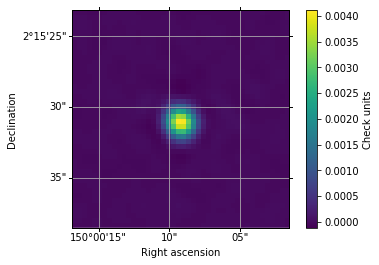

In [20]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# ---------- Loading files ---------
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
image = fits.open(name)[0].data
head  = fits.open(name)[0].header

# ---------- Loads coordinates -----
wcs = WCS(head, naxis=2) 

# ---------- Showing an image ------
f  = plt.figure()
ax = f.add_subplot(1, 1, 1, projection=wcs)
im = ax.imshow(image)

# ----------- Axes labels -----------
ax.set_xlabel('Right ascension')
ax.set_ylabel('Declination')

# ----------- Adding a colorbar -----
col = plt.colorbar(im)              # values are now in the colorbar
col.set_label('Check units')

# ----------- Grid -------------------
ax.grid(True)
f

Jansky vs. miliJansky ... per beam

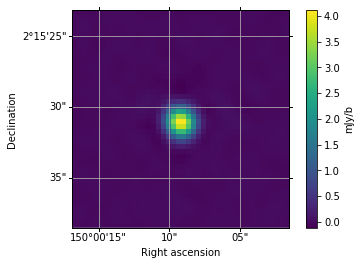

In [21]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# ---------- Loading files ---------
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
image = 1000* fits.open(name)[0].data # Converts Jy/b to mJy/b
head  = fits.open(name)[0].header

# ---------- Loads coordinates -----
wcs = WCS(head, naxis=2) 

# ---------- Showing an image ------
f  = plt.figure()
ax = f.add_subplot(1, 1, 1, projection=wcs)
im = ax.imshow(image)

# ----------- Axes labels -----------
ax.set_xlabel('Right ascension')
ax.set_ylabel('Declination')

# ----------- Adding a colorbar -----
col = plt.colorbar(im)              # values are now in the colorbar
col.set_label('mJy/b')

# ----------- Grid -------------------
ax.grid(True)
f

## Making the plot printer-friendly
* Also declination is in reverse

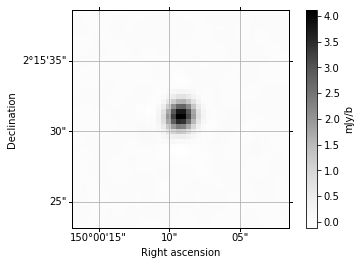

In [26]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# ---------- Loading files ---------
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
image = 1000* fits.open(name)[0].data # Converts Jy/b to mJy/b
head  = fits.open(name)[0].header

# ---------- Loads coordinates -----
wcs = WCS(head, naxis=2) 

# ---------- Showing an image ------
f  = plt.figure()
ax = f.add_subplot(1, 1, 1, projection=wcs)
im = ax.imshow(image, 
               origin = 'lower',
               cmap   = 'Greys')

# ----------- Axes labels -----------
ax.set_xlabel('Right ascension')
ax.set_ylabel('Declination')

# ----------- Adding a colorbar -----
col = plt.colorbar(im)              # values are now in the colorbar
col.set_label('mJy/b')

# ----------- Grid -------------------
ax.grid(True)
f

## Contours

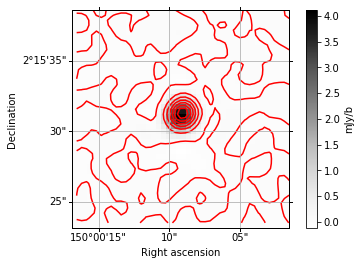

In [27]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# ---------- Loading files ---------
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
image = 1000* fits.open(name)[0].data # Converts Jy/b to mJy/b
head  = fits.open(name)[0].header

# ---------- Loads coordinates -----
wcs = WCS(head, naxis=2) 

# ---------- Showing an image ------
f  = plt.figure()
ax = f.add_subplot(1, 1, 1, projection=wcs)
im = ax.imshow(image,
               origin = 'lower',
               cmap   = 'Greys')

# ----------- Adding contours ------
ax.contour(image,
           colors = 'r',
           origin = 'lower')
# ----------- Axes labels -----------
ax.set_xlabel('Right ascension')
ax.set_ylabel('Declination')

# ----------- Adding a colorbar -----
col = plt.colorbar(im)              # values are now in the colorbar
col.set_label('mJy/b')

# ----------- Grid -------------------
ax.grid(True)
f

## That's too much

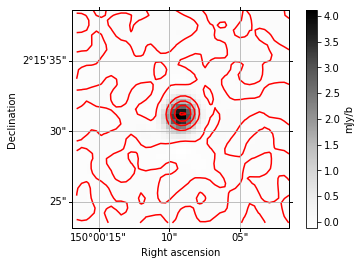

In [28]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# ---------- Loading files ---------
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
image = 1000* fits.open(name)[0].data # Converts Jy/b to mJy/b
head  = fits.open(name)[0].header

# ---------- Loads coordinates -----
wcs = WCS(head, naxis=2) 

# ---------- Showing an image ------
f  = plt.figure()
ax = f.add_subplot(1, 1, 1, projection=wcs)
im = ax.imshow(image,
               origin = 'lower',
               cmap   = 'Greys')

# ----------- Adding contours ------
ax.contour(image,
           levels = [0, 1, 2, 3, 4],
           colors = 'r',
           origin = 'lower')
# ----------- Axes labels -----------
ax.set_xlabel('Right ascension')
ax.set_ylabel('Declination')

# ----------- Adding a colorbar -----
col = plt.colorbar(im)              # values are now in the colorbar
col.set_label('mJy/b')

# ----------- Grid -------------------
ax.grid(True)
f

## Zooming in

Finding the shape of the image - number of pixels in x and y directions

In [29]:
image.shape

(44, 44)

We'll zoom in to the central part of the image.

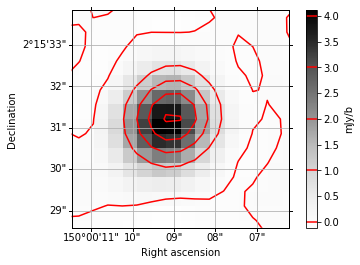

In [30]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# ---------- Loading files ---------
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
image = 1000* fits.open(name)[0].data # Converts Jy/b to mJy/b
head  = fits.open(name)[0].header

# ---------- Loads coordinates -----
wcs = WCS(head, naxis=2) 

# ---------- Showing an image ------
f  = plt.figure()
ax = f.add_subplot(1, 1, 1, projection=wcs)
im = ax.imshow(image,
               origin = 'lower',
               cmap   = 'Greys')

# ----------- Adding contours ------
co = ax.contour(image,
                levels = [0, 1, 2, 3, 4],
                colors = 'r',
                origin = 'lower')
# ----------- Axes labels -----------
ax.set_xlabel('Right ascension')
ax.set_ylabel('Declination')

# ----------- Adding a colorbar -----
col = plt.colorbar(im)              # values are now in the colorbar
col.set_label('mJy/b')
col.add_lines(co)
# ----------- Grid -------------------
ax.grid(True)
ax.set_xlim(15,30)
ax.set_ylim(15,30)
f

## Optical image

/Users/kresimirtisanic/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


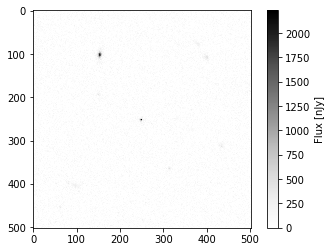

In [39]:
# Loading the image
HST   = '0001_150.00256000_2.25863000_acs_I_100005+0216_unrot_sci_20.fits'
HSTh  = fits.open(HST)[0].header
HSTi  = convnJy* fits.open(HST)[0].data
# Conversions
HSTh['PHOTFLAM'] # ergs/cm2/Ang/electron 
HSTh['PHOTPLAM'] # central λ in Ang
convJy = 3.34*10**(4)*HSTh['PHOTPLAM']**2*HSTh['PHOTFLAM']
convnJy = convJy/10**(-9)
HSTi  = convnJy* HSTi

f = plt.figure()
ax = f.add_subplot(1, 1, 1)
im= ax.imshow(HSTi, vmin=0,cmap='Greys')
col = plt.colorbar(im)              
col.set_label('Flux [nJy]')
f

## Adding the optical image underneath the radio image contours

/Users/kresimirtisanic/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


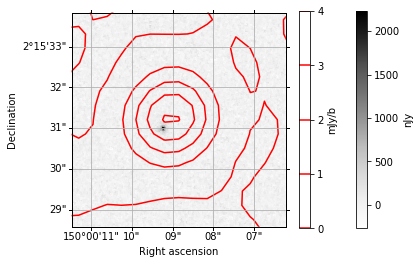

In [51]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# ---------- Loading files ---------
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
image = 1000* fits.open(name)[0].data # Converts Jy/b to mJy/b
head  = fits.open(name)[0].header


# # ---------- Loading optical image -----
HST   = '0001_150.00256000_2.25863000_acs_I_100005+0216_unrot_sci_20.fits'
HSTh  = fits.open(HST)[0].header
HSTi  = convnJy* fits.open(HST)[0].data

# ---------- Conversions -----
HSTh['PHOTFLAM'] # ergs/cm2/Ang/electron 
HSTh['PHOTPLAM'] # central λ in Ang
convJy = 3.34*10**(4)*HSTh['PHOTPLAM']**2*HSTh['PHOTFLAM']
convnJy = convJy/10**(-9)
HSTi  = convnJy* HSTi


# ---------- Loads coordinates -----
wcs  = WCS(head, naxis=2) 
wcsH = WCS(HSTh, naxis=2)

# ---------- Showing an image ------
f  = plt.figure()
ax = f.add_subplot(1, 1, 1, projection=wcs)
im = ax.imshow(HSTi,
               cmap   = 'Greys',
              transform=ax.get_transform(wcsH),
               origin='lower')

# ----------- Adding contours ------
co = ax.contour(image,
                levels = [0, 1, 2, 3, 4],
                colors = 'r',
                origin='lower'
               )
# ----------- Axes labels -----------
ax.set_xlabel('Right ascension')
ax.set_ylabel('Declination')

# ----------- Adding a colorbar -----
coli = plt.colorbar(im)              
col  = plt.colorbar(co)
col.set_label('mJy/b')
coli.set_label('nJy')
# ----------- Grid -------------------
ax.grid(True)
ax.set_xlim(15,30)
ax.set_ylim(15,30)
f

# Image statistics

In [55]:
import numpy as np
#Root mean square noise
RMSim = image.flatten()
RMS = np.sqrt(np.average((RMSim-np.mean(RMSim))**2))
Limit = 5*RMS
Limit

1.6881892085075378

/Users/kresimirtisanic/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


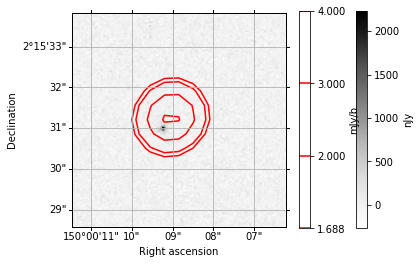

In [56]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# ---------- Loading files ---------
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
image = 1000* fits.open(name)[0].data # Converts Jy/b to mJy/b
head  = fits.open(name)[0].header


# # ---------- Loading optical image -----
HST   = '0001_150.00256000_2.25863000_acs_I_100005+0216_unrot_sci_20.fits'
HSTh  = fits.open(HST)[0].header
HSTi  = convnJy* fits.open(HST)[0].data

# ---------- Conversions -----
HSTh['PHOTFLAM'] # ergs/cm2/Ang/electron 
HSTh['PHOTPLAM'] # central λ in Ang
convJy = 3.34*10**(4)*HSTh['PHOTPLAM']**2*HSTh['PHOTFLAM']
convnJy = convJy/10**(-9)
HSTi  = convnJy* HSTi


# ---------- Loads coordinates -----
wcs  = WCS(head, naxis=2) 
wcsH = WCS(HSTh, naxis=2)

# ---------- Showing an image ------
f  = plt.figure()
ax = f.add_subplot(1, 1, 1, projection=wcs)
im = ax.imshow(HSTi,
               cmap   = 'Greys',
              transform=ax.get_transform(wcsH),
               origin='lower')

# ----------- Adding contours ------
co = ax.contour(image,
                levels = [Limit, 2, 3, 4],
                colors = 'r',
                origin='lower'
               )
# ----------- Axes labels -----------
ax.set_xlabel('Right ascension')
ax.set_ylabel('Declination')

# ----------- Adding a colorbar -----
coli = plt.colorbar(im)              
col  = plt.colorbar(co)
col.set_label('mJy/b')
coli.set_label('nJy')
# ----------- Grid -------------------
ax.grid(True)
ax.set_xlim(15,30)
ax.set_ylim(15,30)
f

# Task 1
1. Find the mean value of the flux in the image using np.mean()
2. Find the minimum and maximum value of the flux
3. How many pixels have fluxes above 5 RMS?
4. What's the mean flux of that cutout?

# Solution

In [166]:
import numpy as np
print('Mean', np.mean(image))
print('Max', np.max(image))
print('Min', np.min(image))
print('Number of px', np.sum(image>Limit))
print('Max flux [mJy]', np.max(image[image>Limit]))
print('Mean flux [mJy]', np.mean(image[image>Limit]))

Mean 0.0523253
Max 4.10531
Min -0.11534
Number of px 24
Max flux [mJy] 4.10531
Mean flux [mJy] 2.73312
Total flux above 5 RMS [mJy] 65.5949


## Where's the peak?

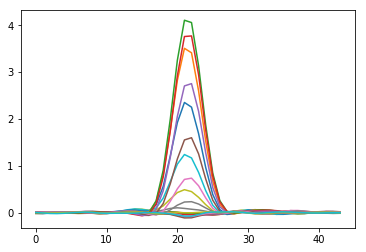

In [60]:
f, ax = plt.subplots(1,1)
for y in range(10, 30):
    ax.plot(image[y,:])
f

# Homework
1. What's the difference between luminosity and flux?
2. Make a pandas table in the following way:
    1. Count how many pixels have fluxes are above 
    [0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003]. That will be the first column
    2. Second column should be the mean flux for each of the cutouts
    3. Third column should be the number of pixels
3. Plot the number of pixels vs. the mean flux
4. Save the table to a fits file

# Notes
* For those who want to know a bit about fits files, see:
https://www.aanda.org/articles/aa/pdf/2001/34/aah2901.pdf
* If you're interested in the images, you can make new ones using: 
http://irsa.ipac.caltech.edu/data/COSMOS/index_cutouts.html

* Images are part of the COSMOS Survey, you can find more about it here:
    https://ui.adsabs.harvard.edu/#abs/2007ASPC..375..166S/abstract